Question No:: 1

Preparing the Dataset:prepare the dataset to proceed

The dataset includes 10 different object categories, such as airplanes, birds, and cars. These class labels are extracted and stored in a list for easy reference.
Selecting One Image Per Class:

The code loops through the dataset to pick out one image from each of the 10 classes. It keeps going until it has collected a single example for every class.
Converting Tensors to Images:

Once we’ve got the images, we convert the


m from tensors to images, which makes it easier to perform operations like rotation and visualization.
Rotating Images:

There’s a function called rotate_image that rotates a given image by a specified angle. This function uses .rotate() method to achieve that.
Comparing Images:

Another function, compare_images, is used to see if two images are exactly the same. It does this by turning the images into numpy arrays and checking if every element in the arrays matches.
Checking Rotation Restoration:

The core of the assignment involves testing whether rotating an image multiple times by an angle of
360
/
𝑛
360/n degrees brings it back to its original form. The function check_rotation_restoration handles this by performing the rotations and then comparing the final result with the original image.
Running the Test on All Classes:


Files already downloaded and verified


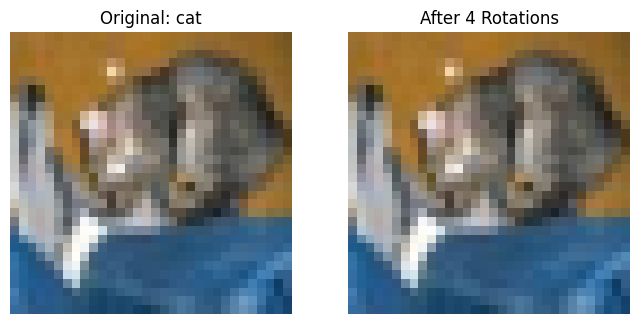

cat: Restored after 4 rotations? Yes


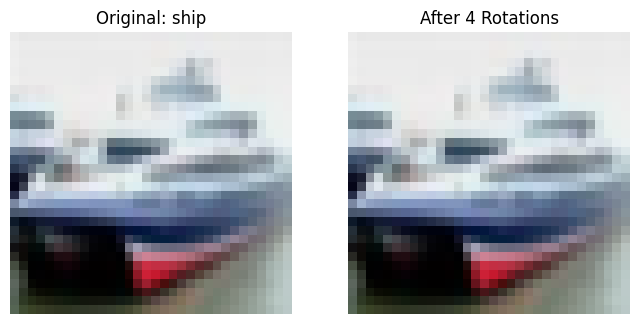

ship: Restored after 4 rotations? Yes


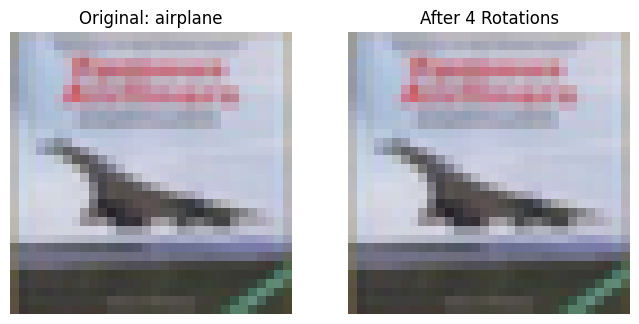

airplane: Restored after 4 rotations? Yes


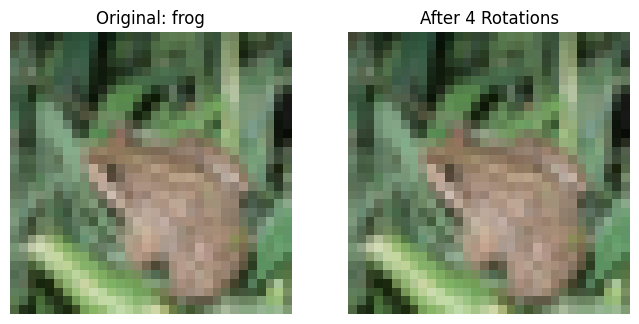

frog: Restored after 4 rotations? Yes


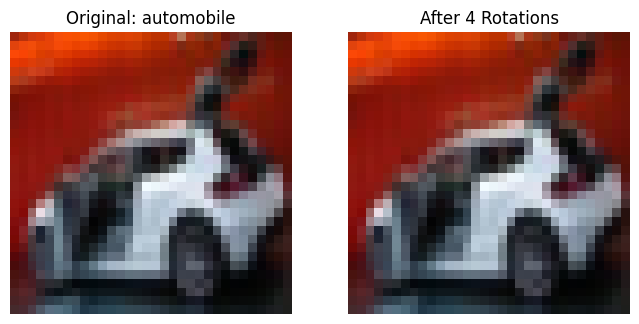

automobile: Restored after 4 rotations? Yes


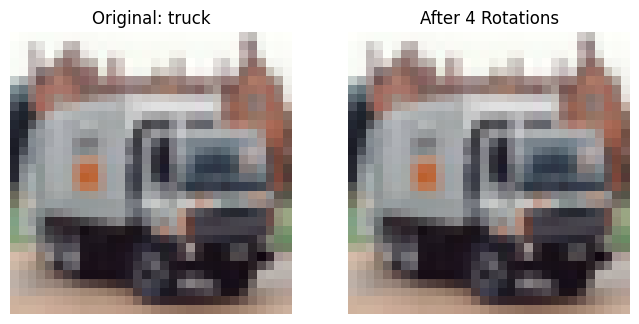

truck: Restored after 4 rotations? Yes


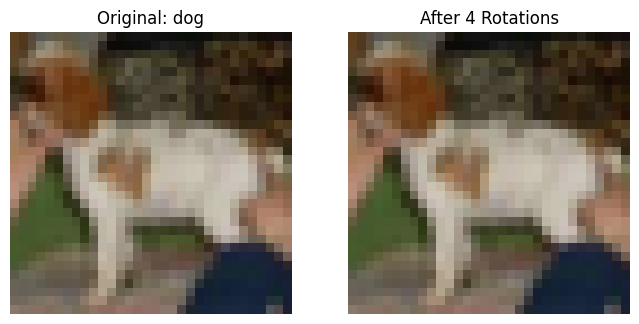

dog: Restored after 4 rotations? Yes


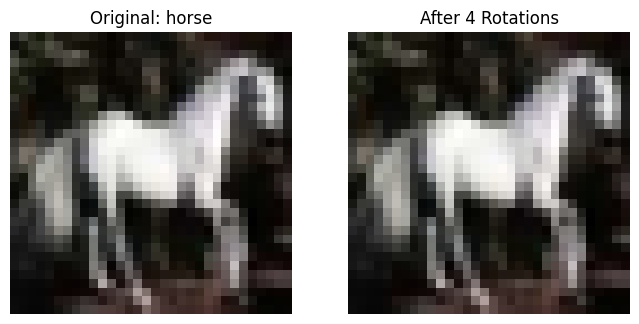

horse: Restored after 4 rotations? Yes


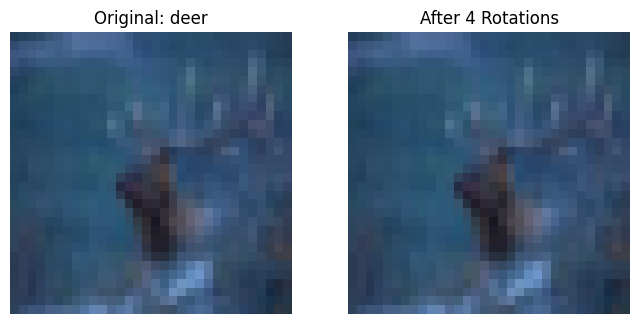

deer: Restored after 4 rotations? Yes


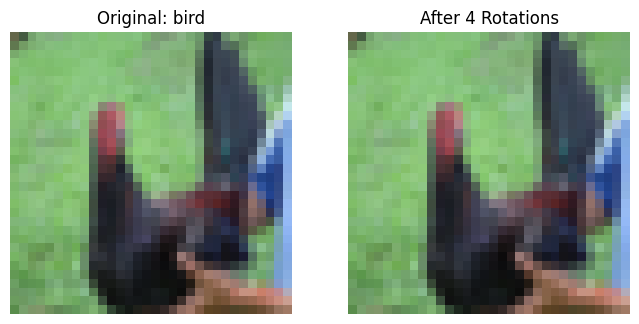

bird: Restored after 4 rotations? Yes


In [31]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import signal

#  Download CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
cifar10 = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Class names in CIFAR-10
class_names = cifar10.classes

# Dictionary to store one image from each class
class_sample_images = {}

# Loop through the dataset and collect one image from each class
for i in range(len(cifar10)):
    img, label = cifar10[i]
    class_name = class_names[label]
    if class_name not in class_sample_images:
        class_sample_images[class_name] = img
    if len(class_sample_images) == 10:
        break

# Convert the tensors to PIL images for easier processing
pil_images = [transforms.ToPILImage()(img_tensor) for img_tensor in class_sample_images.values()]

# Function to rotate an image by a given angle
def rotate_image(img, angle):
    """
    Rotates an image by the specified angle (in degrees) about its center.
    """
    return img.rotate(angle)

# Function to check if two images are identical
def compare_images(img1, img2):
    """
    Compares two images and returns True if they are identical, otherwise False.
    """
    img1_array = np.array(img1)
    img2_array = np.array(img2)
    return np.array_equal(img1_array, img2_array)

# Function to test rotation restoration
def check_rotation_restoration(img, n):
    """
    Rotates the image n times by θ = 360/n degrees and checks if the original image is restored.
    """
    angle = 360 / n
    rotated_img = img

    for _ in range(n):
        rotated_img = rotate_image(rotated_img, angle)

    # Compare the original image with the image after n rotations
    is_restored = compare_images(img, rotated_img)

    return is_restored, rotated_img

# Set n and test the rotation for each class
n = 4  # You can change this value for different tests

# Compare the original and rotated images for one image from each class
for class_name, img in zip(class_sample_images.keys(), pil_images):
    restored, rotated_img = check_rotation_restoration(img, n)

    # Display the original and rotated images
    plt.figure(figsize=(8, 4))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Original: {class_name}")
    plt.axis('off')

    # Rotated image
    plt.subplot(1, 2, 2)
    plt.imshow(rotated_img)
    plt.title(f"After {n} Rotations")
    plt.axis('off')

    plt.show()

    # Print comparison result
    print(f"{class_name}: Restored after {n} rotations? {'Yes' if restored else 'No'}")


Question No:: 2
Selecting Images:

The code loops through the dataset to collect one image per class, ensuring that each category is represented.
Image and Histogram Plotting:

A function, plot_image_and_histogram, converts the selected image to grayscale, then computes and displays both the grayscale image and its histogram (which shows pixel intensity distribution).
Creating Subplots:

For each of the 10 selected images, two subplots are created: one for the grayscale image and one for its corresponding histogram.
Display:

The resulting images and histograms are arranged in a 10x2 grid, and the visual output is displayed. Each image is labeled with its respective class name.


Files already downloaded and verified


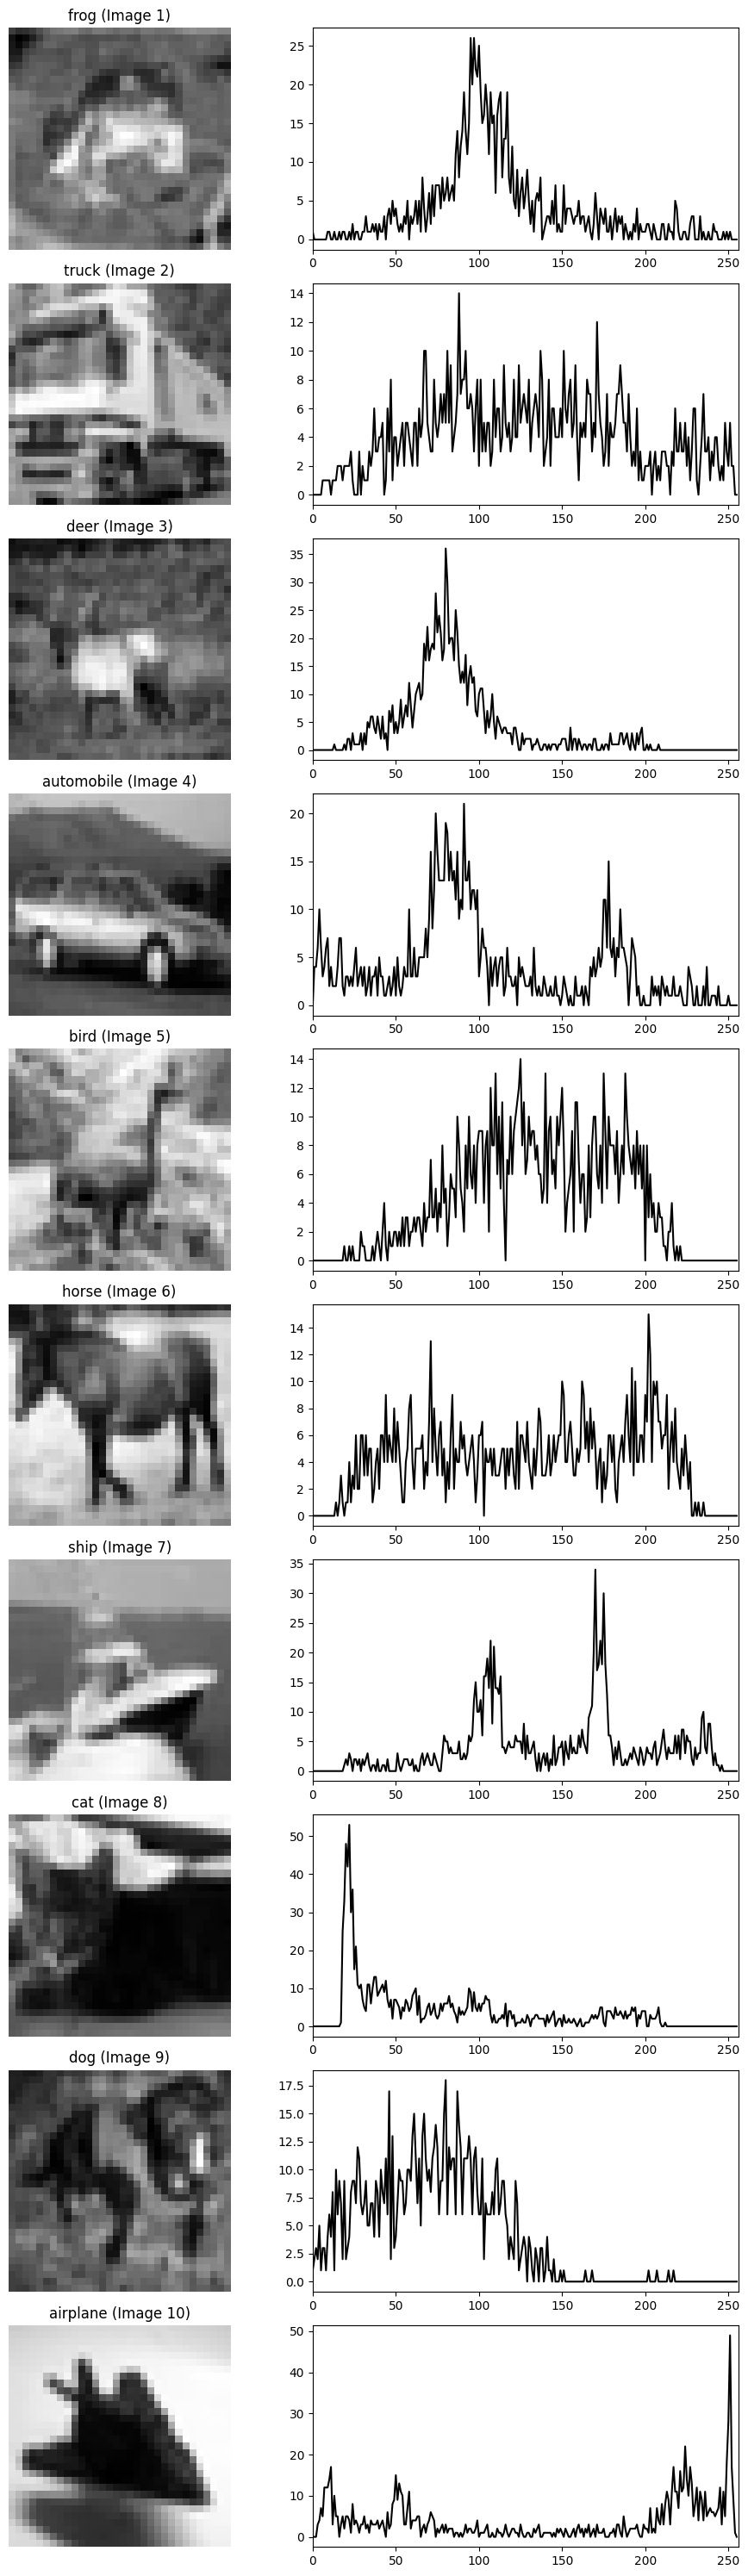

In [32]:
# Download the CIFAR-10 dataset
cifar10_dataset = datasets.CIFAR10(root='./data', train=True, download=True)

# Class names in CIFAR-10
class_names = cifar10_dataset.classes

# Dictionary to store one image from each class
class_sample_images = {}

# Loop through the dataset and collect one image from each class
for i in range(len(cifar10_dataset)):
    image, label = cifar10_dataset[i]
    class_name = class_names[label]
    if class_name not in class_sample_images:
        class_sample_images[class_name] = image
    if len(class_sample_images) == 10:
        break

# Function to plot an image and its histogram
def plot_image_and_histogram(image, ax_img, ax_hist):
    # Convert image to grayscale
    gray_image = transforms.functional.to_grayscale(image)

    # Convert grayscale image to NumPy array for plotting
    gray_image_np = np.array(gray_image)

    # Plot the grayscale image
    ax_img.imshow(gray_image_np, cmap='gray')
    ax_img.axis('off')  # Hide axes

    # Calculate histogram
    histogram, bins = np.histogram(gray_image_np.flatten(), bins=256, range=(0, 256))

    # Plot histogram
    ax_hist.plot(bins[:-1], histogram, color='black')
    ax_hist.set_xlim([0, 256])

# Create a figure with subplots for images and their histograms
fig, axs = plt.subplots(10, 2, figsize=(10, 30))

# Loop through the selected images (one from each class)
for i, (class_name, image) in enumerate(class_sample_images.items()):
    # Plot original image and histogram
    plot_image_and_histogram(image, axs[i, 0], axs[i, 1])

    # Set title for the image subplot
    axs[i, 0].set_title(f'{class_name} (Image {i + 1})')

plt.tight_layout()
plt.show()


Qustion No:: 2B

Histogram Equalization:

A function, histogram_equalization, converts an image to grayscale and applies OpenCV’s histogram equalization to enhance image contrast.
Plotting Original Images and Histograms:

The plot_image_and_histogram function converts each image to grayscale and plots both the grayscale image and its histogram (which shows the distribution of pixel intensities).
Plotting Equalized Images and Histograms:

The plot_equalized_image_and_histogram function applies histogram equalization to the image and displays the resulting enhanced image alongside its updated histogram.
Subplot Layout:

A 10x4 grid of subplots is created where:
The first two columns display the original grayscale image and its histogram.
The last two columns show the equalized image and its histogram.
Display:

The resulting images and histograms are shown for all 10 selected images, allowing a comparison between the original and equalized versions.



Files already downloaded and verified


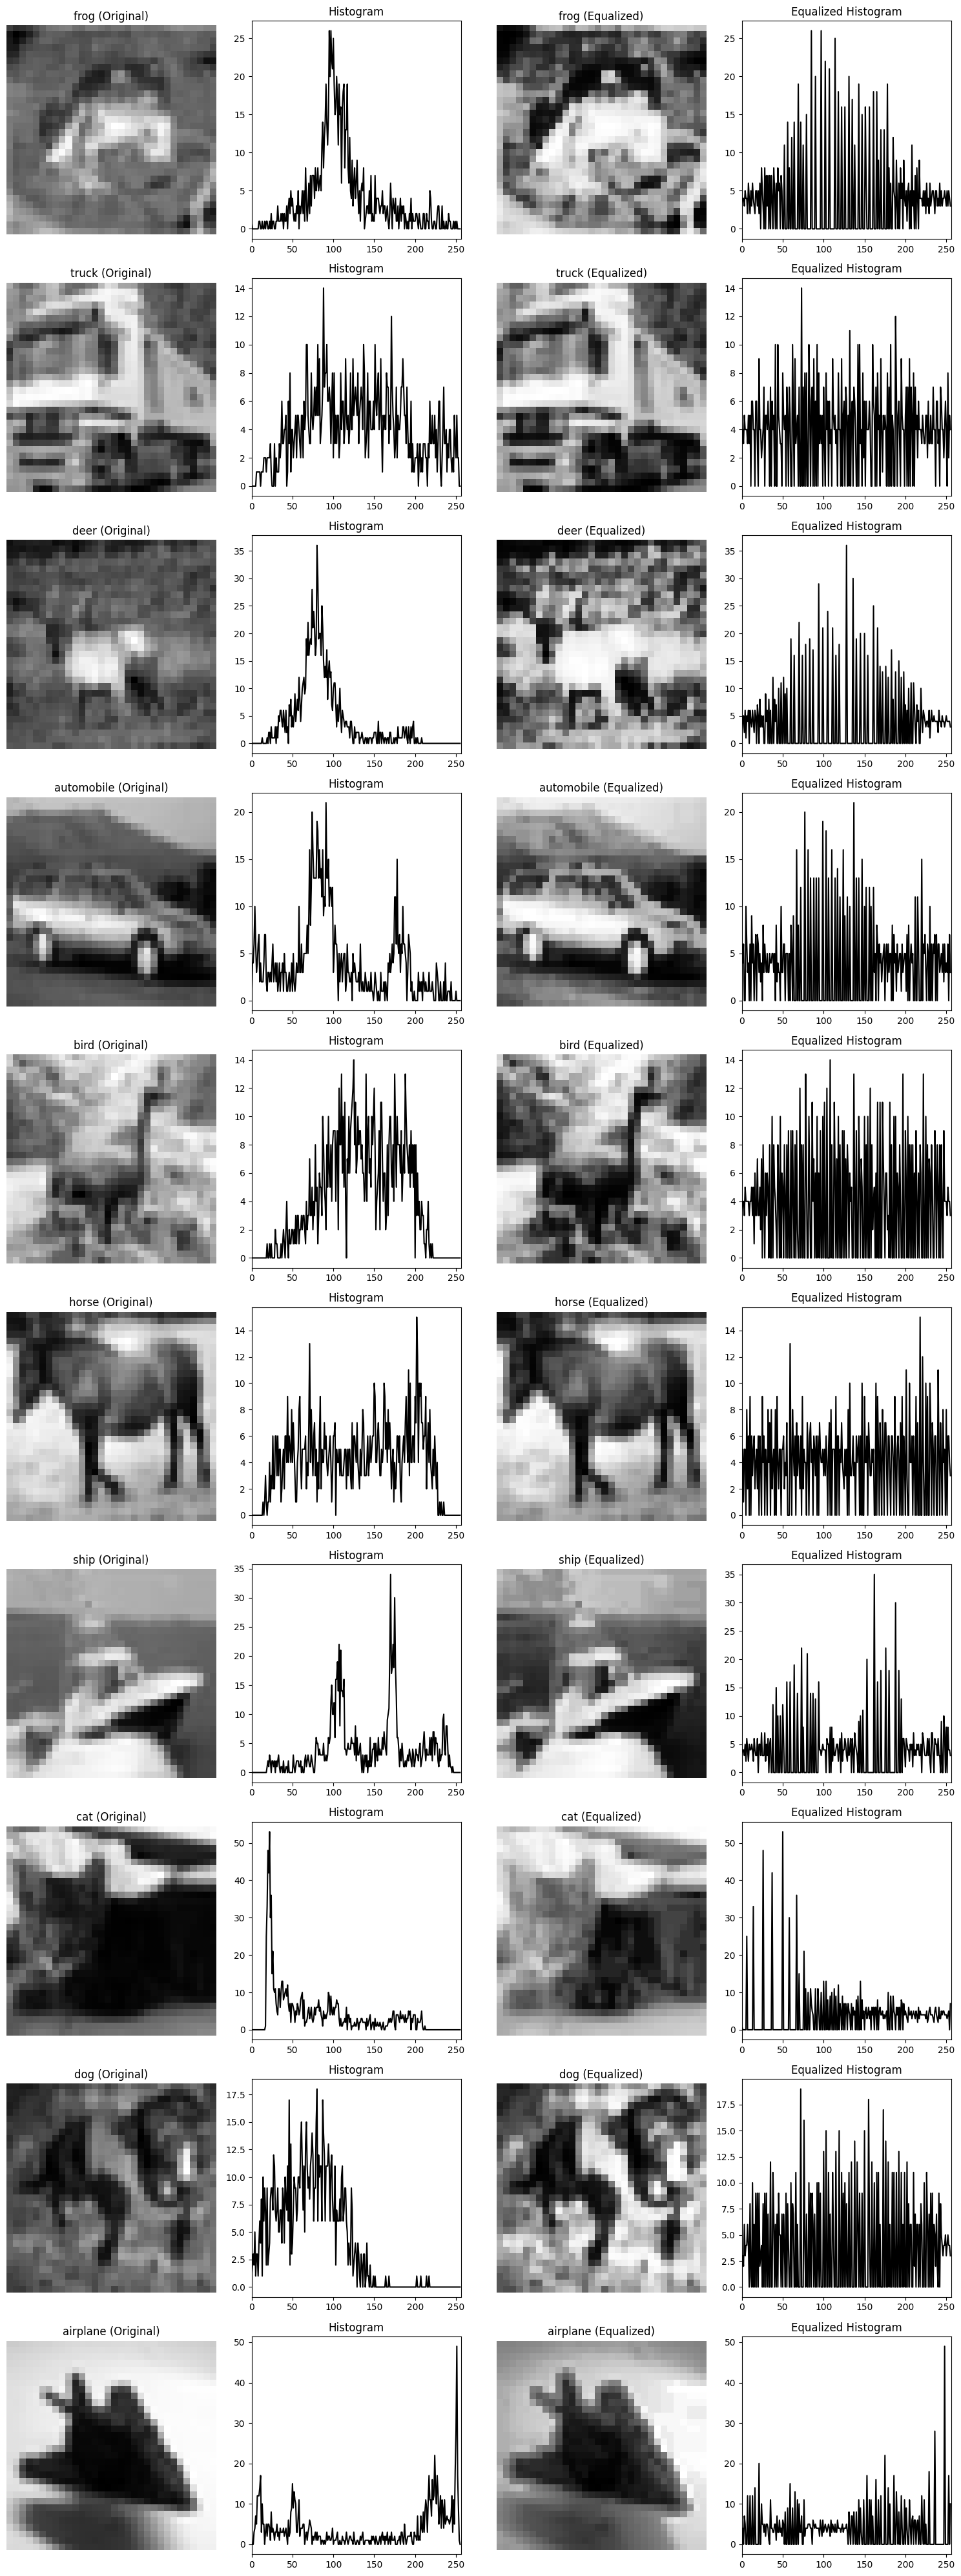

In [33]:
# Download the CIFAR-10 dataset
cifar10_dataset = datasets.CIFAR10(root='./data', train=True, download=True)

# Class names in CIFAR-10
class_names = cifar10_dataset.classes

# Dictionary to store one image from each class
class_sample_images = {}

# Loop through the dataset and collect one image from each class
for i in range(len(cifar10_dataset)):
    image, label = cifar10_dataset[i]
    class_name = class_names[label]
    if class_name not in class_sample_images:
        class_sample_images[class_name] = image
    if len(class_sample_images) == 10:
        break

# Function to perform histogram equalization using OpenCV
def histogram_equalization(image):
    # Convert the image to a NumPy array
    img_array = np.array(image)

    # Convert the RGB image to grayscale using OpenCV
    gray_image = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)

    # Perform histogram equalization using OpenCV
    img_equalized = cv2.equalizeHist(gray_image)

    return img_equalized, gray_image

# Function to plot an image and its histogram
def plot_image_and_histogram(image, ax_img, ax_hist, title="Image"):
    # Convert image to grayscale using torchvision transform
    gray_image = transforms.functional.to_grayscale(image)

    # Convert grayscale image to NumPy array for plotting
    gray_image_np = np.array(gray_image)

    # Plot the grayscale image
    ax_img.imshow(gray_image_np, cmap='gray')
    ax_img.axis('off')  # Hide axes
    ax_img.set_title(title)

    # Calculate and plot histogram
    histogram, bins = np.histogram(gray_image_np.flatten(), bins=256, range=(0, 256))
    ax_hist.plot(bins[:-1], histogram, color='black')
    ax_hist.set_xlim([0, 256])
    ax_hist.set_title('Histogram')

# Function to plot an equalized image and its histogram
def plot_equalized_image_and_histogram(image, ax_img, ax_hist, title="Equalized Image"):
    # Perform histogram equalization
    equalized_image, gray_image = histogram_equalization(image)

    # Plot the equalized image
    ax_img.imshow(equalized_image, cmap='gray')
    ax_img.axis('off')  # Hide axes
    ax_img.set_title(title)

    # Calculate and plot histogram
    histogram, bins = np.histogram(equalized_image.flatten(), bins=256, range=(0, 256))
    ax_hist.plot(bins[:-1], histogram, color='black')
    ax_hist.set_xlim([0, 256])
    ax_hist.set_title('Equalized Histogram')

# Create a figure with subplots for images and their histograms
fig, axs = plt.subplots(10, 4, figsize=(15, 40))

# Loop through the first 10 images (one from each class)
for i, (class_name, image) in enumerate(class_sample_images.items()):
    # Plot original grayscale image and its histogram
    plot_image_and_histogram(image, axs[i, 0], axs[i, 1], title=f'{class_name} (Original)')

    # Plot equalized image and its histogram
    plot_equalized_image_and_histogram(image, axs[i, 2], axs[i, 3], title=f'{class_name} (Equalized)')

plt.tight_layout()
plt.show()


Question No::3

Image Selection:

The code loops through the dataset and selects one image from each class, storing these in a dictionary until all 10 classes are represented.
Image Processing:

The process_image function first converts the image tensor to a NumPy array, normalizing the pixel values.
The image is then converted to grayscale, simplifying it to a single channel.
A binary version is created using thresholding, where pixel values are either black or white, highlighting contrast.
The binary and original images are blended together to visualize the highlighted features against the original image.
Displaying Results:

The images are displayed in a 3x10 grid with rows for the original, binary, and blended images. Class names are labeled above each column, allowing for easy comparison of the transformations.

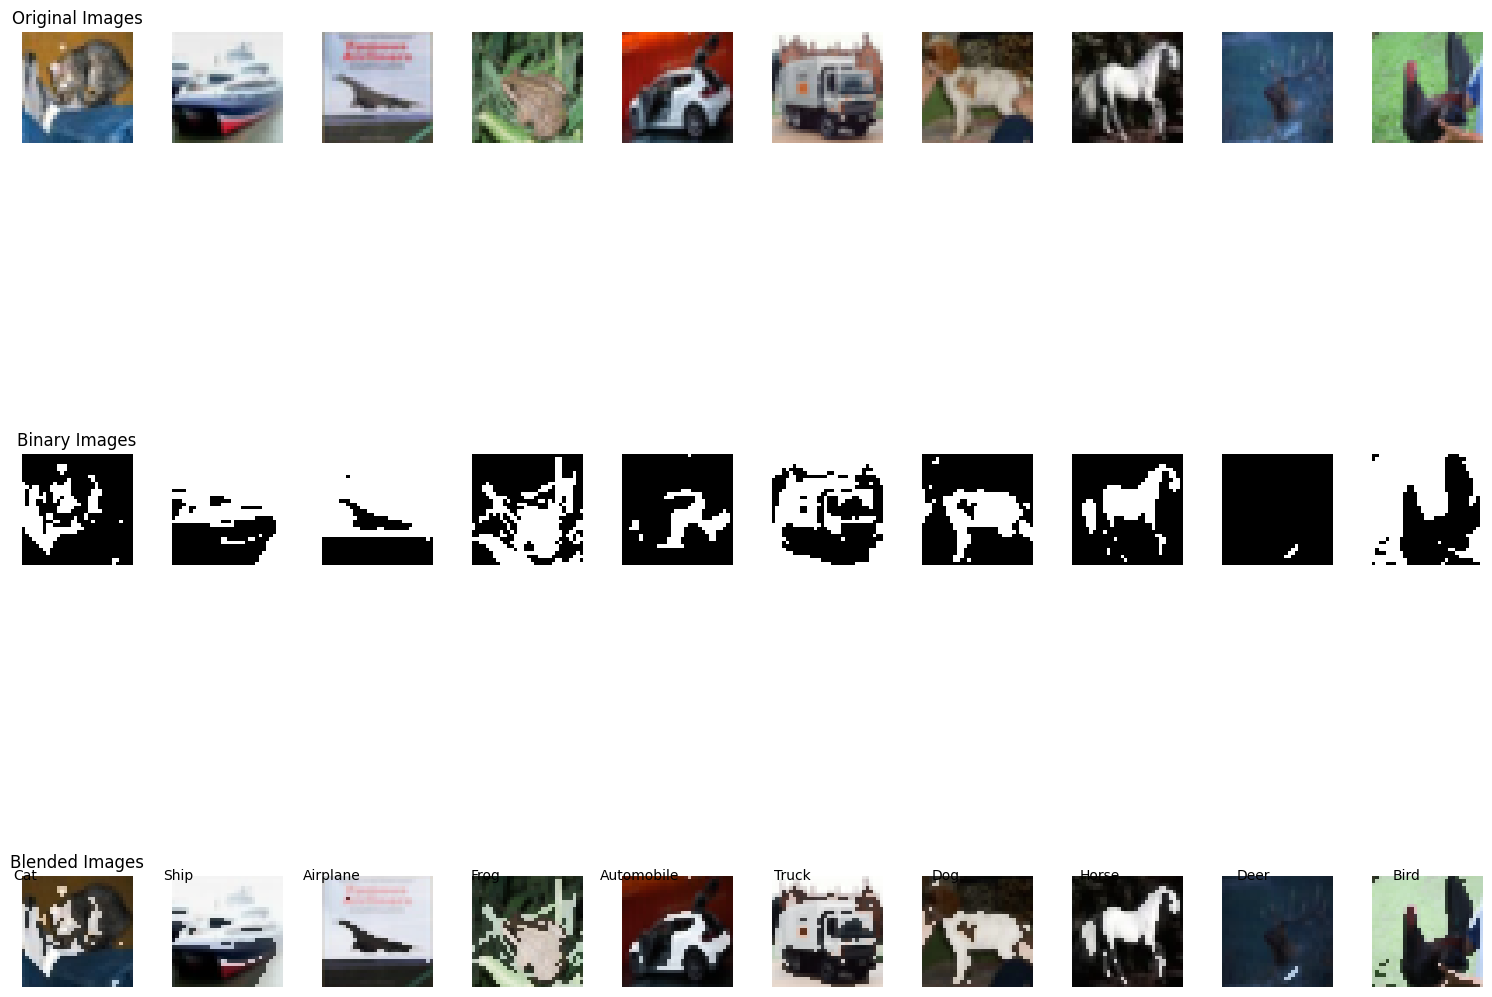

In [34]:
# Class names for CIFAR-10
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat',
    'Deer', 'Dog', 'Frog', 'Horse',
    'Ship', 'Truck'
]

# Dictionary to store one image from each class
class_sample_images = {}

# Loop through the dataset and collect one image from each class
for i in range(len(cifar10)):
    img, label = cifar10[i]
    class_name = class_names[label]
    if class_name not in class_sample_images:
        class_sample_images[class_name] = img
    if len(class_sample_images) == 10:
        break

# Function to process the image: convert to grayscale, create binary, and blend
def process_image(image):
    # Convert tensor to numpy array and normalize to [0, 255]
    img_np = image.numpy().transpose(1, 2, 0) * 255
    img_np = img_np.astype(np.uint8)

    # Convert to grayscale
    gray_image = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

    # Apply threshold to create binary image
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

    # Blend binary image with original image
    blended_image = cv2.addWeighted(img_np, 0.5, cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR), 0.5, 0)

    return img_np, binary_image, blended_image

# Display original, binary, and blended images for one image from each class
plt.figure(figsize=(15, 15))
for i, (class_name, image) in enumerate(class_sample_images.items()):
    original_img, binary_img, blended_img = process_image(image)

    # Display original image
    plt.subplot(3, 10, i + 1)
    plt.imshow(original_img)
    plt.axis('off')
    if i == 0:  # Add title for the first row
        plt.title("Original Images", fontsize=12)

    # Display binary image
    plt.subplot(3, 10, i + 11)
    plt.imshow(binary_img, cmap='gray')
    plt.axis('off')
    if i == 0:  # Add title for the second row
        plt.title("Binary Images", fontsize=12)

    # Display blended image
    plt.subplot(3, 10, i + 21)
    plt.imshow(blended_img)
    plt.axis('off')
    if i == 0:  # Add title for the third row
        plt.title("Blended Images", fontsize=12)

    # Add class name above each column of images
    plt.text(i + 0.5, -0.5, class_name, ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()


Question No:: 4

Class Names and Image Selection:

The code selects one image per class from the CIFAR-10 dataset and stores these in a dictionary for processing.

Filter Functions:

The code defines several filters (grayscale, average pooling, lowpass, highpass, sharpening, and Wiener) for transforming images, using OpenCV and SciPy.
Image Conversion:

The tensor_to_image() function converts image tensors into NumPy arrays and normalizes them for proper display and processing.
Applying Filters:

Each image is converted to grayscale, and then all filters are applied, including a combination of lowpass and highpass for enhanced effect.
Visualization:

Images are displayed in a grid, showing the original grayscale alongside the results of each applied filter, with titles indicating the filter type.
Layout and Display:

The layout is adjusted for neatness, and the images are shown using matplotlib with a clean, axis-free visualization.


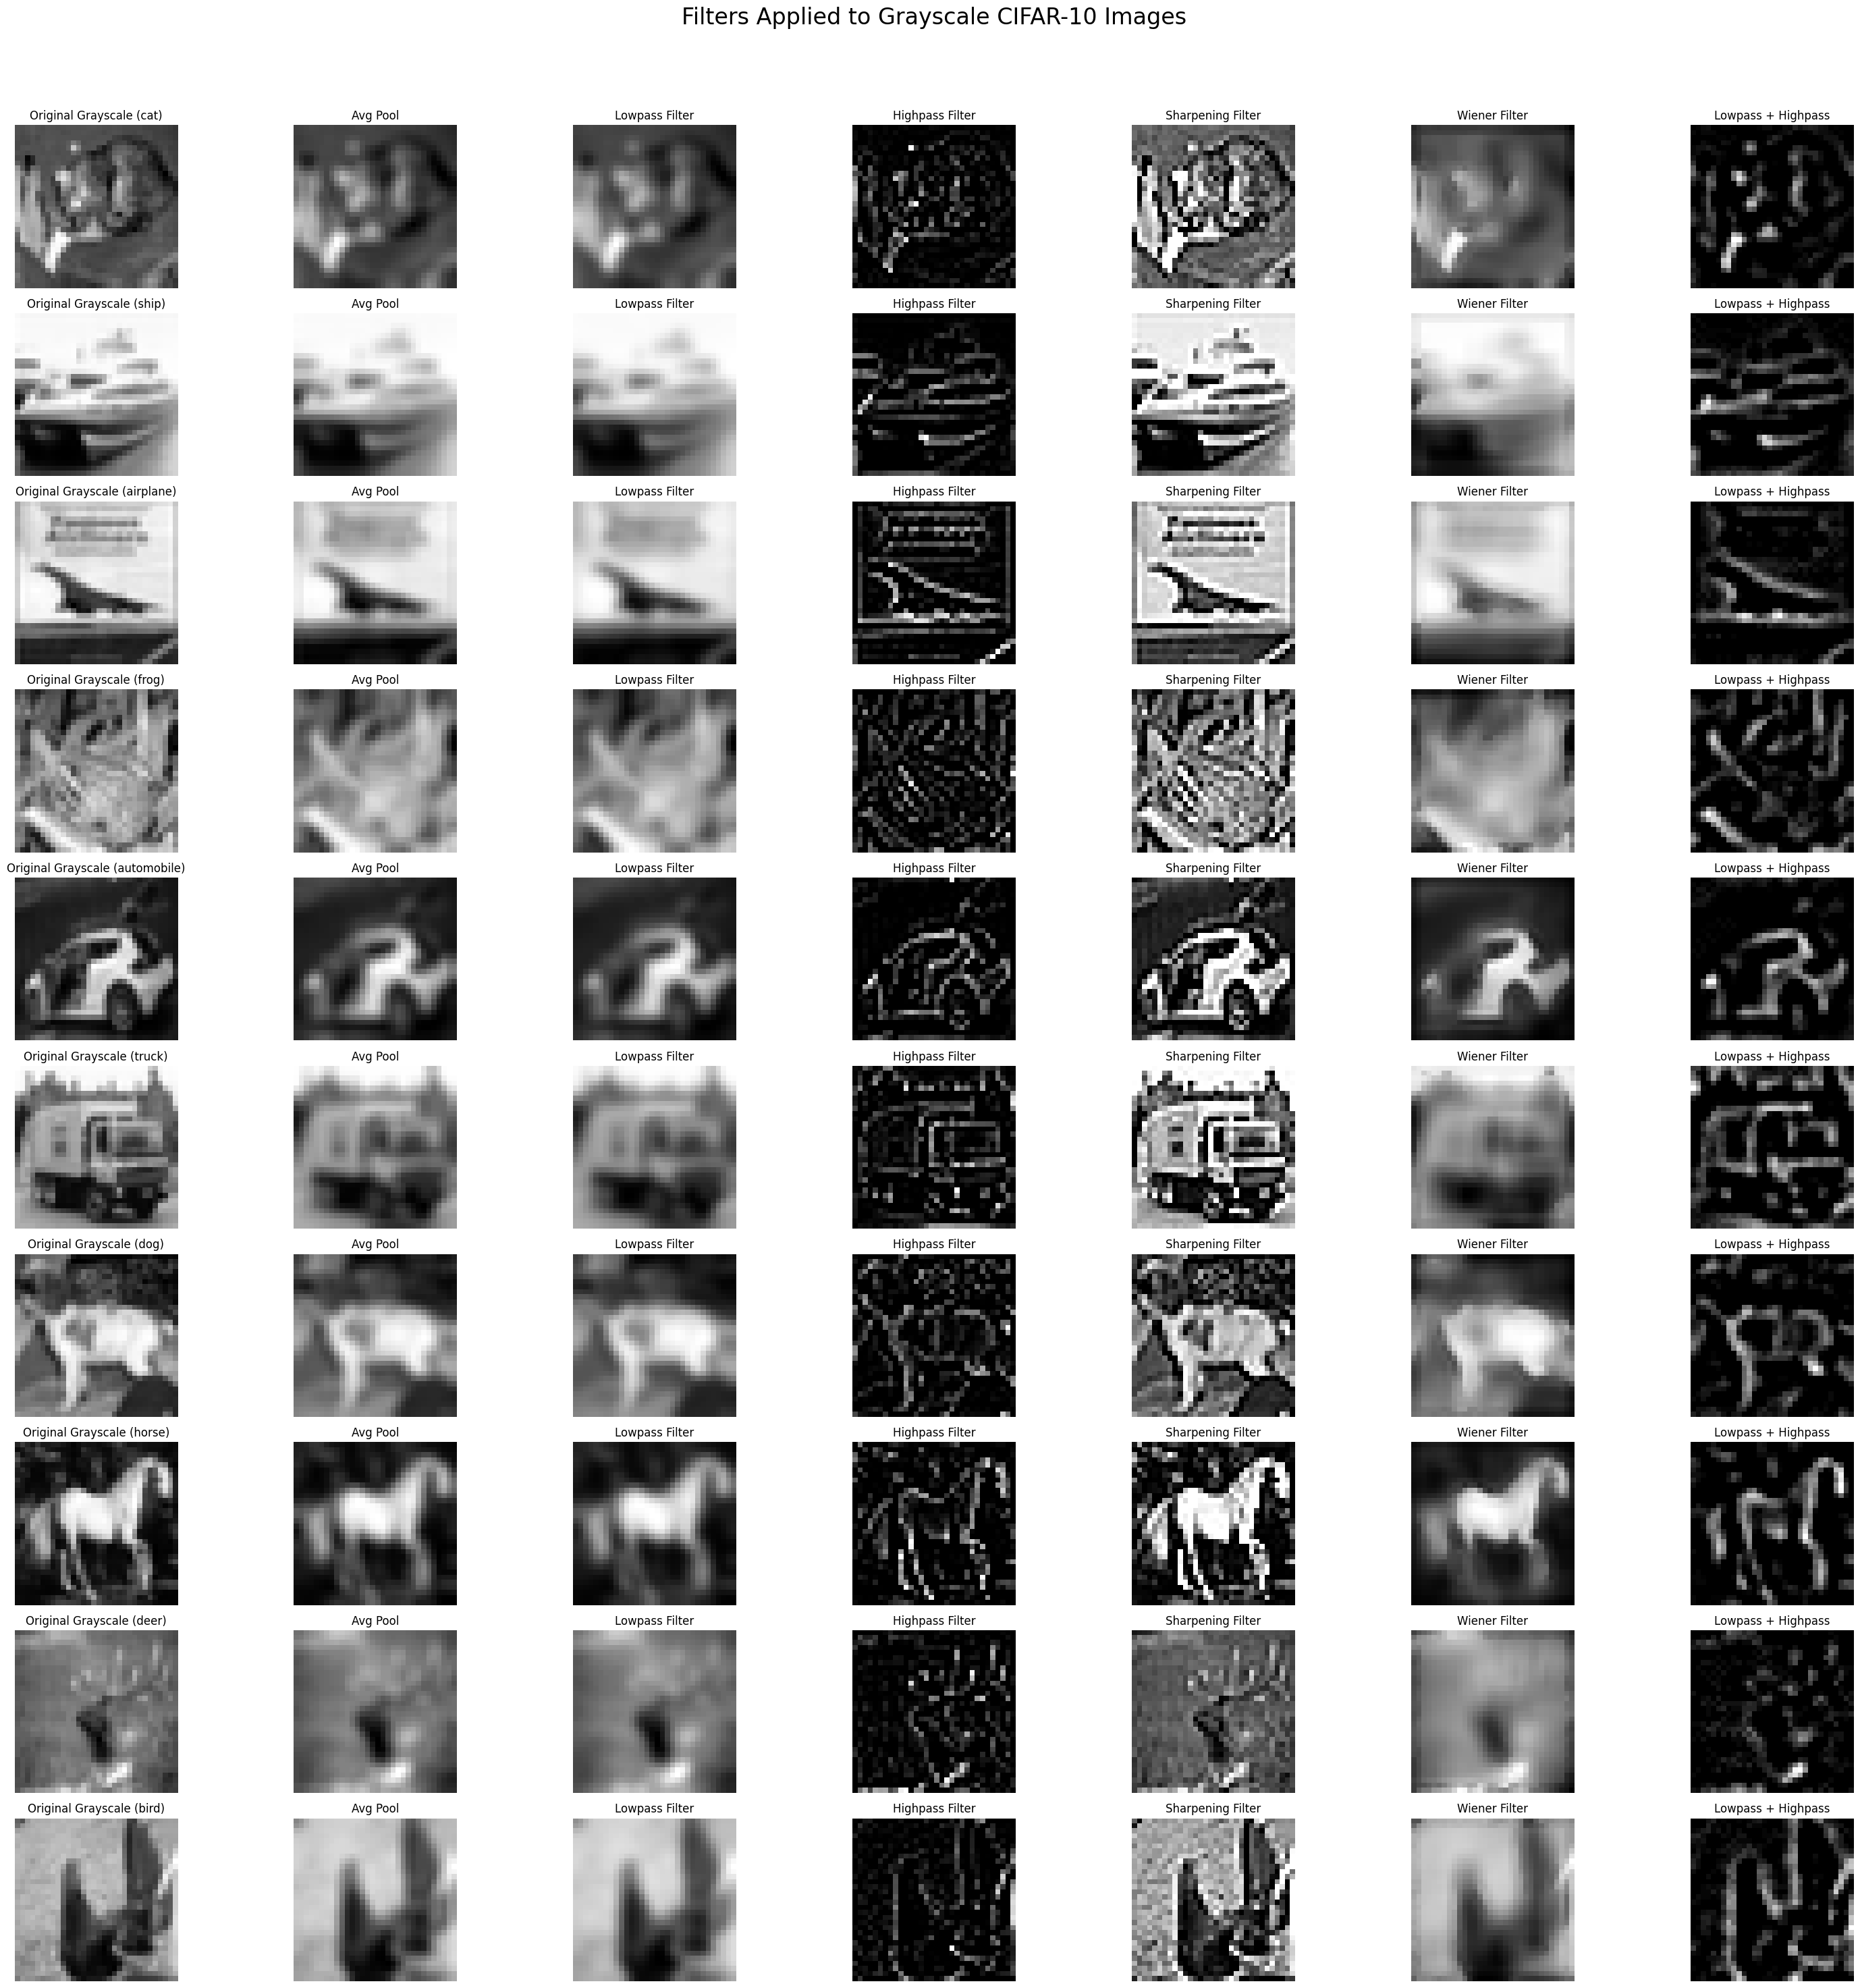

In [35]:
# Step 2: Get one image per class
# CIFAR-10 classes
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_images = {}

# Loop through the test set and store one image for each class
for images, labels in testloader:
    label = labels.item()
    class_name = classes[label]
    if class_name not in class_images:
        class_images[class_name] = images[0]
    if len(class_images) == len(classes):
        break

# Step 3: Define filters as functions
# Convert the image to grayscale before applying any filter
def to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Average Pooling (Convolution)
def apply_avg_pool(image):
    kernel = np.ones((3, 3), np.float32) / 9
    return cv2.filter2D(image, -1, kernel)

# Lowpass Filter (Gaussian Blur)
def apply_lowpass_filter(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Highpass Filter
def apply_highpass_filter(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 4, -1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

# Sharpening Filter
def apply_sharpening_filter(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

# Wiener Filter (Using scipy's Wiener function)
def apply_wiener_filter(image):
    # Convert image to float64 for Wiener filter compatibility
    image = image.astype(np.float64)
    filtered_image = signal.wiener(image, (5, 5))
    return filtered_image

# Step 4: Function to convert tensor to numpy array and normalize for display
def tensor_to_image(tensor):
    image = tensor.numpy().transpose(1, 2, 0)  # Change dimensions to HxWxC
    image = (image * 255).astype(np.uint8)  # Convert pixel values to 0-255 range
    return image

# Step 5: Apply each filter to each of the 10 chosen images after converting to grayscale
fig, axes = plt.subplots(len(classes), 7, figsize=(30, 30))  # Increase figure size for better visibility
fig.suptitle('Filters Applied to Grayscale CIFAR-10 Images', fontsize=24)
for idx, (class_name, image_tensor) in enumerate(class_images.items()):
    # Convert tensor to image
    original_image = tensor_to_image(image_tensor)
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

    # Convert to grayscale
    grayscale_image = to_grayscale(original_image_rgb)

    # Apply filters
    avg_pool_image = apply_avg_pool(grayscale_image)
    lowpass_image = apply_lowpass_filter(grayscale_image)
    highpass_image = apply_highpass_filter(grayscale_image)
    sharpen_image = apply_sharpening_filter(grayscale_image)
    wiener_image = apply_wiener_filter(grayscale_image)

    # Combine lowpass and highpass filters
    combined_image = apply_highpass_filter(lowpass_image)

    # Display images (grayscale images use cmap='gray')
    axes[idx, 0].imshow(grayscale_image, cmap='gray')
    axes[idx, 0].set_title(f'Original Grayscale ({class_name})', fontsize=12)

    axes[idx, 1].imshow(avg_pool_image, cmap='gray')
    axes[idx, 1].set_title('Avg Pool', fontsize=12)

    axes[idx, 2].imshow(lowpass_image, cmap='gray')
    axes[idx, 2].set_title('Lowpass Filter', fontsize=12)

    axes[idx, 3].imshow(highpass_image, cmap='gray')
    axes[idx, 3].set_title('Highpass Filter', fontsize=12)

    axes[idx, 4].imshow(sharpen_image, cmap='gray')
    axes[idx, 4].set_title('Sharpening Filter', fontsize=12)

    axes[idx, 5].imshow(wiener_image, cmap='gray')
    axes[idx, 5].set_title('Wiener Filter', fontsize=12)

    axes[idx, 6].imshow(combined_image, cmap='gray')
    axes[idx, 6].set_title('Lowpass + Highpass', fontsize=12)

# Remove axis labels for a cleaner display
for ax in axes.flat:
    ax.axis('off')

# Show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Question No:: 5

Step 2: Collecting One Image per Class
The code collects one image from each of the ten CIFAR-10 classes, storing them in a dictionary.

Step 3: Function to Convert Tensor to Image
A function converts PyTorch tensors to images by adjusting dimensions and scaling pixel values to [0, 255].

Step 4: Applying 2D DFT and Inverse DFT on RGB Images
It applies a 2D Discrete Fourier Transform (DFT) to each color channel of the images, then reconstructs them using the inverse DFT and calculates the Mean Squared Error (MSE) for accuracy assessment.

Displaying Results
The results are displayed in a grid format with original images, DFT spectra, and reconstructed images, while MSE values are printed for each class.


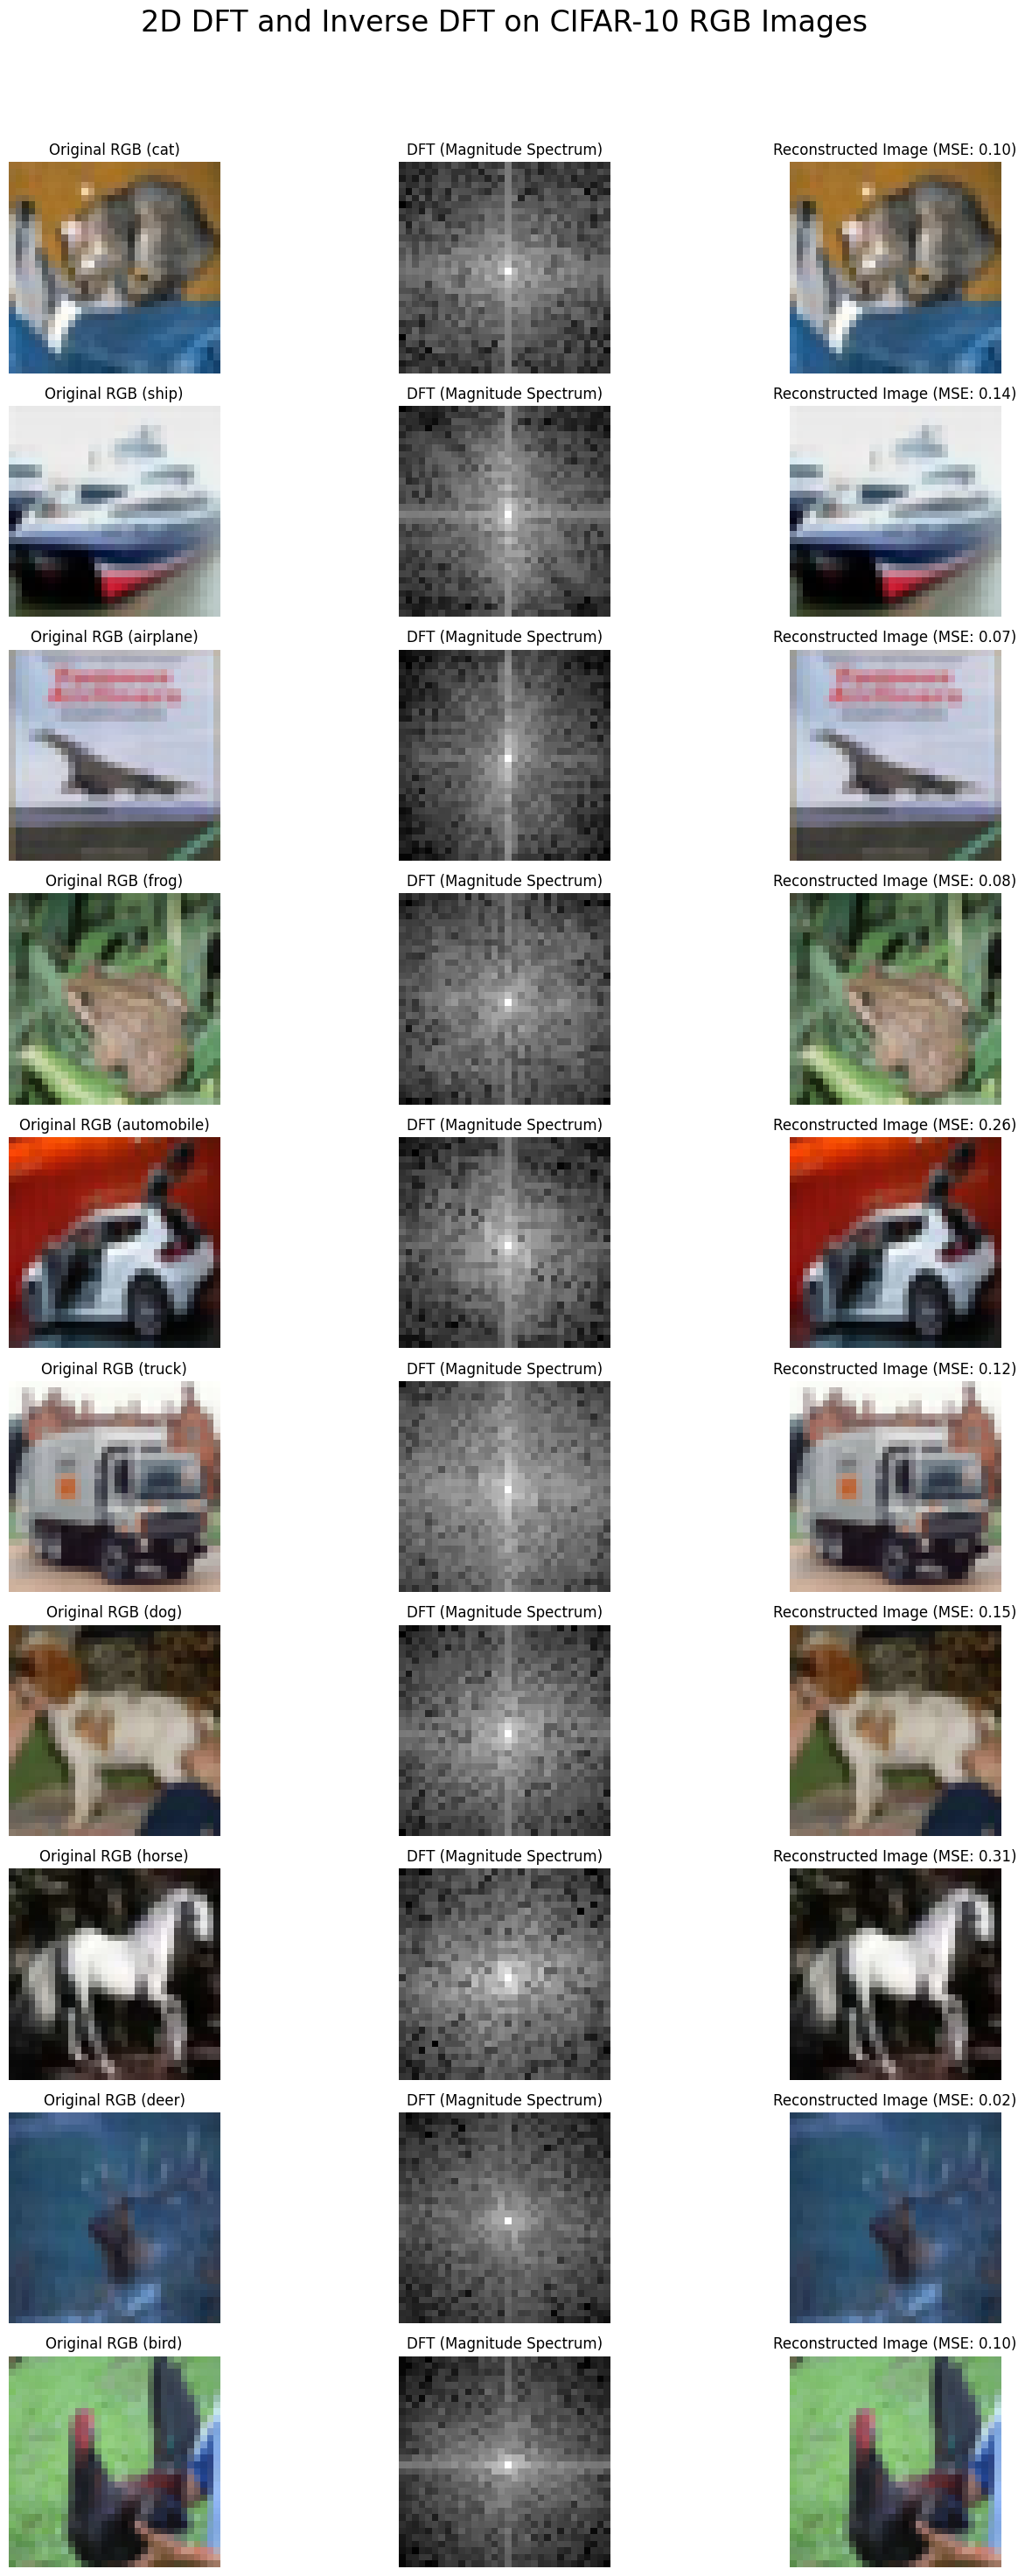

Mean Squared Error (MSE) between Original and Reconstructed Images for Each Class:
cat: 0.10
ship: 0.14
airplane: 0.07
frog: 0.08
automobile: 0.26
truck: 0.12
dog: 0.15
horse: 0.31
deer: 0.02
bird: 0.10


In [36]:
# Step 2: Get one image per class
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_images = {}

for images, labels in testloader:
    label = labels.item()
    class_name = classes[label]
    if class_name not in class_images:
        class_images[class_name] = images[0]
    if len(class_images) == len(classes):
        break

# Step 3: Function to convert tensor to image
def tensor_to_image(tensor):
    image = tensor.numpy().transpose(1, 2, 0)  # Change dimensions to HxWxC
    image = (image * 255).astype(np.uint8)  # Convert pixel values to 0-255 range
    return image

# Calculate MSE (Mean Squared Error)
def calculate_mse(original, reconstructed):
    return np.mean((original - reconstructed) ** 2)

# Step 4: Apply 2D DFT and Inverse DFT on RGB images
fig, axes = plt.subplots(len(classes), 3, figsize=(15, 30))  # Increase figure size for better visibility
fig.suptitle('2D DFT and Inverse DFT on CIFAR-10 RGB Images', fontsize=24)

mse_values = []  # To store MSE values for each class

for idx, (class_name, image_tensor) in enumerate(class_images.items()):
    # Convert tensor to image
    original_image = tensor_to_image(image_tensor)

    # Split the original image into its three channels (R, G, B)
    original_image_r = original_image[:, :, 0]
    original_image_g = original_image[:, :, 1]
    original_image_b = original_image[:, :, 2]

    # Calculate 2D DFT for each channel
    dft_r = np.fft.fft2(original_image_r)
    dft_g = np.fft.fft2(original_image_g)
    dft_b = np.fft.fft2(original_image_b)

    # Shift zero frequency component to the center of the spectrum for better visualization
    dft_shifted_r = np.fft.fftshift(dft_r)
    dft_shifted_g = np.fft.fftshift(dft_g)
    dft_shifted_b = np.fft.fftshift(dft_b)

    # Calculate Inverse DFT (Reconstruction) for each channel
    idft_shifted_r = np.fft.ifftshift(dft_shifted_r)  # Inverse shift
    idft_shifted_g = np.fft.ifftshift(dft_shifted_g)
    idft_shifted_b = np.fft.ifftshift(dft_shifted_b)

    reconstructed_r = np.fft.ifft2(idft_shifted_r)
    reconstructed_g = np.fft.ifft2(idft_shifted_g)
    reconstructed_b = np.fft.ifft2(idft_shifted_b)

    # Get the magnitude of the complex numbers and clip values
    reconstructed_r = np.abs(reconstructed_r).clip(0, 255)
    reconstructed_g = np.abs(reconstructed_g).clip(0, 255)
    reconstructed_b = np.abs(reconstructed_b).clip(0, 255)

    # Stack the channels to form the reconstructed RGB image
    reconstructed_image = np.stack([reconstructed_r, reconstructed_g, reconstructed_b], axis=-1).astype(np.uint8)

    # Calculate the Mean Squared Error (MSE) between the original and reconstructed images
    mse = calculate_mse(original_image, reconstructed_image)
    mse_values.append((class_name, mse))

    # Display images
    axes[idx, 0].imshow(original_image)
    axes[idx, 0].set_title(f'Original RGB ({class_name})', fontsize=12)

    # Display DFT magnitude spectrum (combined for visualization)
    combined_dft_magnitude = np.log(1 + np.sqrt(np.abs(dft_shifted_r)**2 + np.abs(dft_shifted_g)**2 + np.abs(dft_shifted_b)**2))
    axes[idx, 1].imshow(combined_dft_magnitude, cmap='gray')
    axes[idx, 1].set_title('DFT (Magnitude Spectrum)', fontsize=12)

    axes[idx, 2].imshow(reconstructed_image)
    axes[idx, 2].set_title(f'Reconstructed Image (MSE: {mse:.2f})', fontsize=12)

# Remove axis labels for a cleaner display
for ax in axes.flat:
    ax.axis('off')

# Show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print the MSE values for each class
print("Mean Squared Error (MSE) between Original and Reconstructed Images for Each Class:")
for class_name, mse in mse_values:
    print(f"{class_name}: {mse:.2f}")
